In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/zonal current.csv',skiprows=14, header=None)


df.columns = ['DATETIME', 'TIME', 'LON', 'LAT', 'DEP','U']

df = df.drop('DATETIME', axis=1)


df['U'] = df['U'].replace(-1.0E+34, np.nan)

# Drop rows with NaN values
df = df.dropna(subset=['U'])

daily_means = df.groupby('U')['U'].mean()

for time, group in df.groupby('U'):
    df.loc[(df['U'] == time) & (df['U'].isna()), 'U'] = daily_means[time]

print(df)


X = df[['TIME', 'LON', 'LAT']]
y = df['U']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr:.6f}")
print(f"R² Score: {r2_lr:.6f}")

coefficients = pd.DataFrame({
    'Feature': ['TIME', 'LON', 'LAT'],
    'Coefficient': lr_model.coef_
})
intercept = lr_model.intercept_

print("Model Coefficients:")
print(coefficients)
print(f"Intercept: {intercept:.6f}")





#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Squared Error: {mse_rf:.6f}")
print(f"R² Score: {r2_rf:.6f}")

feature_importance = pd.DataFrame({
    'Feature': ['TIME', 'LON', 'LAT'],
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)



          TIME   LON      LAT  DEP         U
0      44194.5  83.5  15.8162    5 -0.284010
1      44194.5  84.0  15.8162    5 -0.223665
2      44194.5  81.5  16.1466    5 -0.034553
3      44194.5  82.0  16.1466    5 -0.109984
4      44194.5  82.5  16.1466    5 -0.211849
...        ...   ...      ...  ...       ...
17447  44557.5  83.0  17.1780    5 -0.098566
17448  44557.5  83.5  17.1780    5 -0.224508
17449  44557.5  84.0  17.1780    5 -0.148421
17455  44557.5  84.0  17.5356    5 -0.075160
17461  44557.5  84.0  17.9000    5 -0.081100

[8732 rows x 5 columns]
Linear Regression Results:
Mean Squared Error: 0.040905
R² Score: 0.328452
Model Coefficients:
  Feature  Coefficient
0    TIME    -0.001435
1     LON    -0.006899
2     LAT     0.043254
Intercept: 63.547742

Random Forest Results:
Mean Squared Error: 0.002864
R² Score: 0.952988
Feature Importance:
  Feature  Importance
0    TIME    0.768219
2     LAT    0.136233
1     LON    0.095548


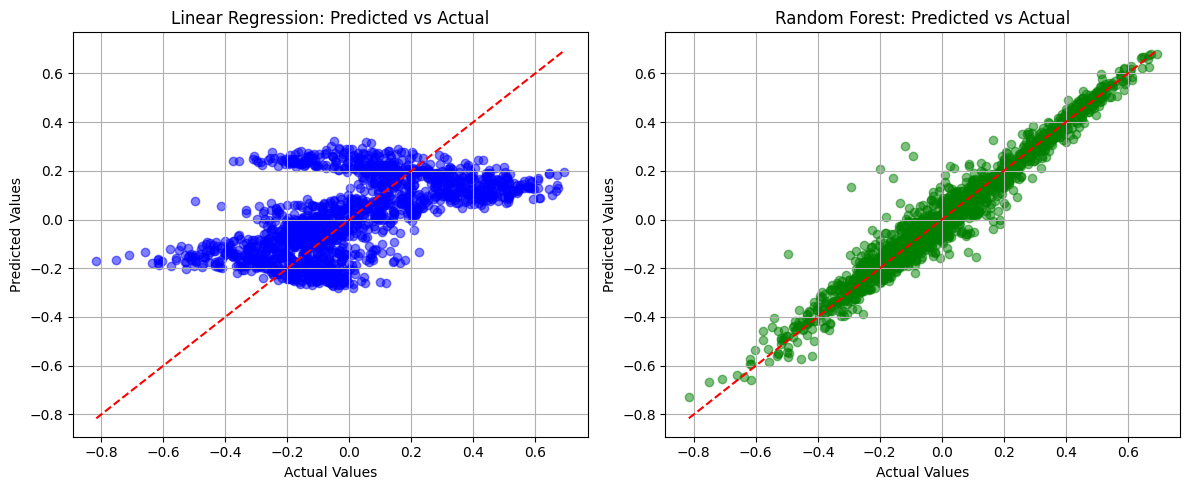

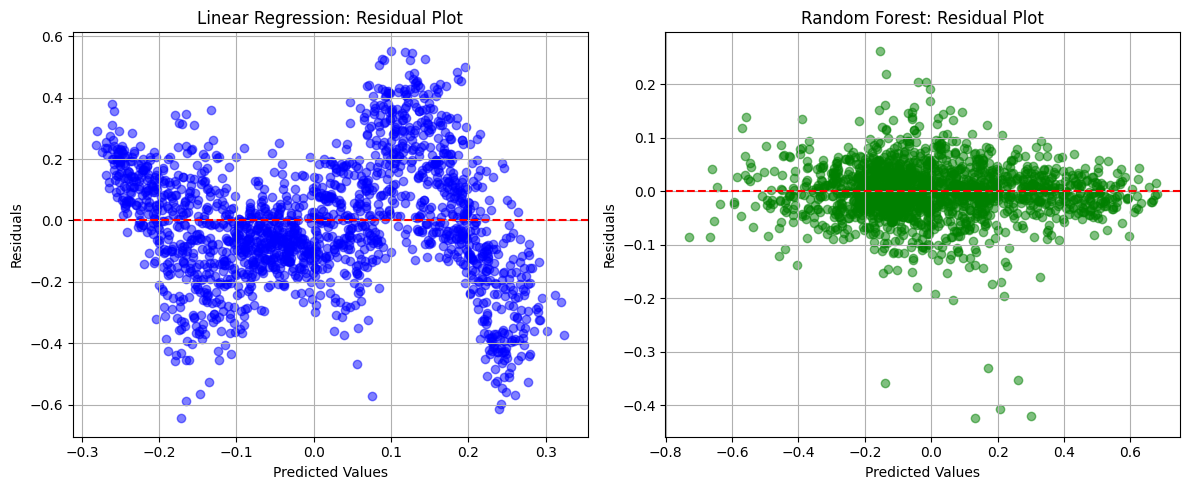

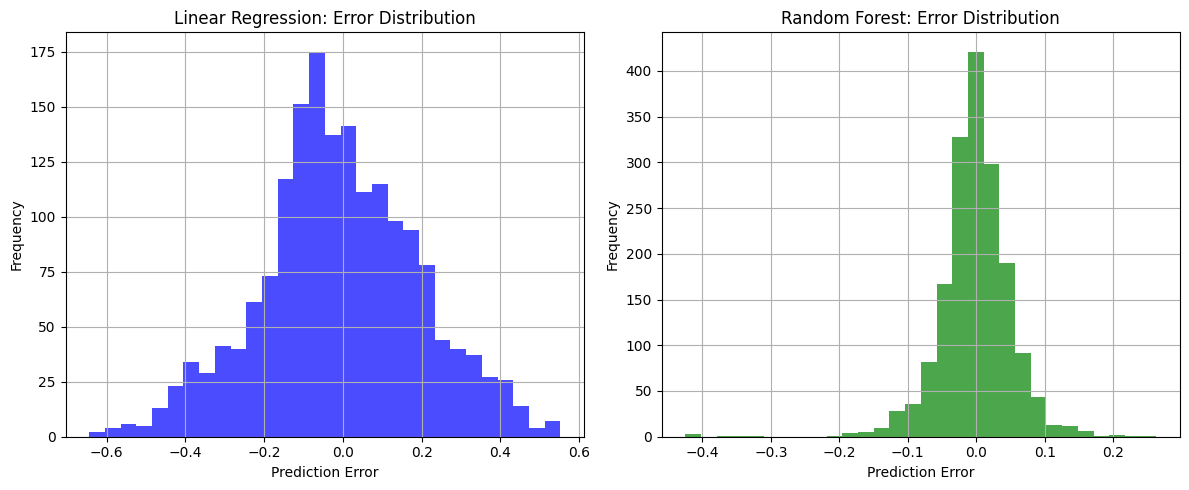

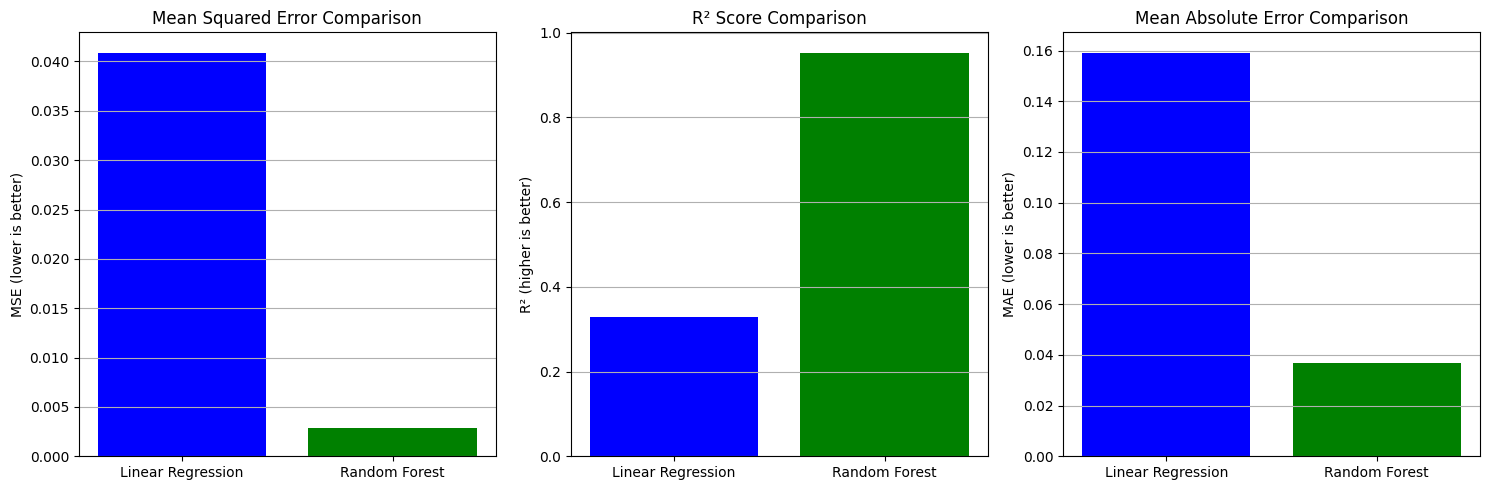

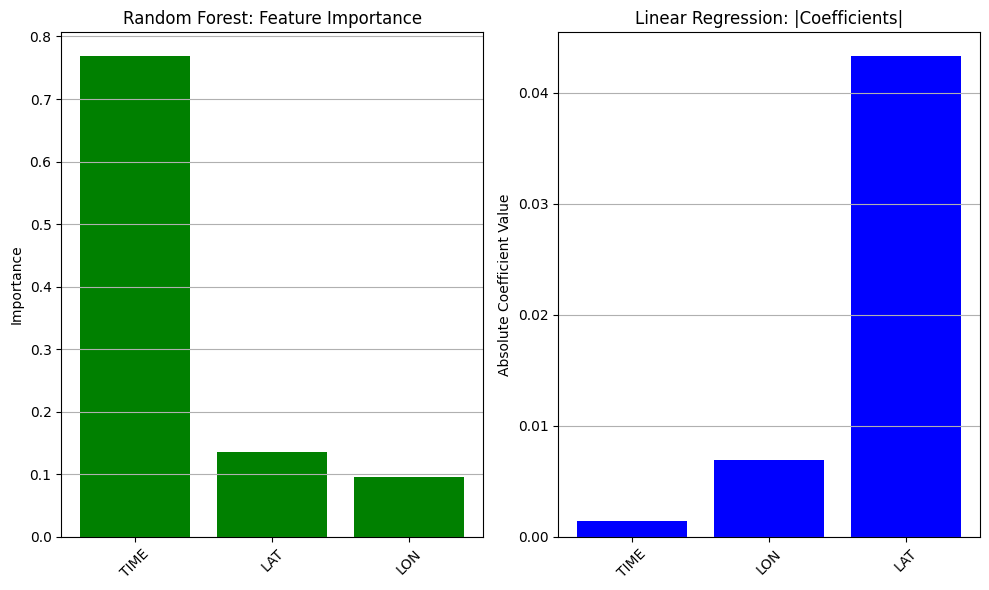

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# 1. Predicted vs Actual Scatter Plots
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Residual Plots
plt.figure(figsize=(12, 5))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
residuals_lr = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals_lr, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Linear Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Random Forest Residuals
plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, color='green', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Random Forest: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Error Distribution Histogram
plt.figure(figsize=(12, 5))

# Linear Regression Error Distribution
plt.subplot(1, 2, 1)
plt.hist(residuals_lr, bins=30, color='blue', alpha=0.7)
plt.title('Linear Regression: Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)

# Random Forest Error Distribution
plt.subplot(1, 2, 2)
plt.hist(residuals_rf, bins=30, color='green', alpha=0.7)
plt.title('Random Forest: Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Model Comparison Bar Chart
models = ['Linear Regression', 'Random Forest']
mse_values = [mse_lr, mse_rf]
r2_values = [r2_lr, r2_rf]
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_values = [mae_lr, mae_rf]

plt.figure(figsize=(15, 5))

# MSE Comparison
plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE (lower is better)')
plt.grid(axis='y')

# R² Comparison
plt.subplot(1, 3, 2)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² (higher is better)')
plt.grid(axis='y')

# MAE Comparison
plt.subplot(1, 3, 3)
plt.bar(models, mae_values, color=['blue', 'green'])
plt.title('Mean Absolute Error Comparison')
plt.ylabel('MAE (lower is better)')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Feature Importance Visualization
plt.figure(figsize=(10, 6))

# Random Forest Feature Importance
plt.subplot(1, 2, 1)
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='green')
plt.title('Random Forest: Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Linear Regression Coefficients (absolute values)
plt.subplot(1, 2, 2)
coef_abs = np.abs(coefficients['Coefficient'])
plt.bar(coefficients['Feature'], coef_abs, color='blue')
plt.title('Linear Regression: |Coefficients|')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
last_day = df['TIME'].max()
next_day = last_day + 1.0

unique_locations = df[['LON', 'LAT']].drop_duplicates()

next_day_df = pd.DataFrame()
next_day_df['TIME'] = [next_day] * len(unique_locations)
next_day_df['LON'] = unique_locations['LON'].values
next_day_df['LAT'] = unique_locations['LAT'].values

lr_predictions = lr_model.predict(next_day_df)
rf_predictions = rf_model.predict(next_day_df)

next_day_df['LR_Predicted_SSH'] = lr_predictions
next_day_df['RF_Predicted_SSH'] = rf_predictions

print(f"\nPredictions for day {next_day} (relative to Jan 1, 1901):")
print(next_day_df.head(10))



Predictions for day 44558.5 (relative to Jan 1, 1901):
      TIME   LON      LAT  LR_Predicted_SSH  RF_Predicted_SSH
0  44558.5  83.5  15.8162         -0.285049          0.021939
1  44558.5  84.0  15.8162         -0.288499          0.029100
2  44558.5  81.5  16.1466         -0.256959         -0.073754
3  44558.5  82.0  16.1466         -0.260409         -0.098481
4  44558.5  82.5  16.1466         -0.263859         -0.064355
5  44558.5  83.0  16.1466         -0.267308          0.015580
6  44558.5  83.5  16.1466         -0.270758          0.044652
7  44558.5  84.0  16.1466         -0.274208          0.018506
8  44558.5  82.5  16.4836         -0.249282         -0.047142
9  44558.5  83.0  16.4836         -0.252732         -0.018665
